In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')
#https://pytorch.org/hub/ultralytics_yolov5/

Using cache found in C:\Users\aanch/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-8-13 Python-3.10.0 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:


# from roboflow import Roboflow
# rf = Roboflow(api_key="cHf2ZHYe8Oh85Y3p6l6L")
# project = rf.workspace("drowsynessdetection").project("drive_assist")
# dataset = project.version(1).download("yolov5")
from roboflow import Roboflow
rf = Roboflow(api_key="cHf2ZHYe8Oh85Y3p6l6L")
project = rf.workspace("augmented-startups").project("drowsiness-detection-cntmz")
dataset = project.version(2).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Drowsiness-Detection-2 in yolov5pytorch:: 100%|██████████| 2472/2472 [00:04<00:00, 538.49it/s]


worker 2 , to reduce the work (GPU )

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 1

In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom',path ='yolov5/runs/train/exp/weights/last.pt',force_reload=True)

NameError: name 'torch' is not defined

In [ ]:
img = 'img9.jpg'
result = model(img)
result.print()

image 1/1: 416x416 (no detections)
Speed: 24.1ms pre-process, 691.0ms inference, 7.9ms NMS per image at shape (1, 3, 640, 640)


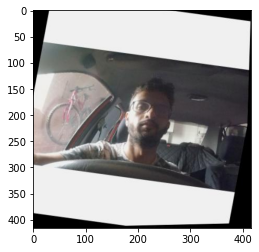

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    result = model(frame)
    cv2.imshow('YOLO', np.squeeze(result.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()